# Step - 1: Reading and Understanding the dataset

In [1170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1171]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1172]:
df.shape

(9240, 37)

In [1173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1174]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step - 2: Exploratory Data Analysis

## Dropping Columns

### Dropping Columns with more than 35% null values

In [1175]:
# Checking null values in dataframe column-wise in percentage
null_percentage = df.isnull().sum()*100/df.shape[0]
null_percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [1176]:
# Dropping Columns with more than 35% missing values
columns_to_drop = null_percentage[null_percentage > 35].index

df = df.drop(columns=columns_to_drop)
df.shape

(9240, 31)

### Column Country

In [1177]:
df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [1178]:
df["Country"].isnull().sum()*100/df.shape[0]

26.634199134199132

In [1179]:
df["Country"].value_counts(normalize=True)["India"]*100

95.76633721787874

There are 26% values in this column is null and for non-null values, around 96% value is India. So, there is high imbalance in the data. Also, the column named City is present in the data which gives idea about the geographical location. So, the column country can be removed from the data as it doesn't provide much significant information. 

In [1180]:
# Drop column country from dataframe
df.drop('Country', axis=1, inplace=True)

In [1181]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


### Columns Prospect ID and Lead Number

Both columns Propspect Id and Lead Number are like unique identifier (ID) for each row, so there is no meaning in keeping those column for analysis.

In [1182]:
# Drop Prospect Id column
df.drop(['Prospect ID'], axis=1, inplace=True)
df.shape

(9240, 29)

In [1183]:
# Drop Lead Number column
df.drop(['Lead Number'], axis=1, inplace=True)
df.shape 

(9240, 28)

### Checking Categorical Variables

In [1184]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


#### Lead Origin and Lead Source Columns

In [1185]:
df["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [1186]:
df["Lead Source"].value_counts() 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

There are very few number of observations (1 or 2) compared to original datasize for many categories in Lead Source which will lead to more number of variables for analysis, when dummy variables will be created from it. So, records with those categories are dropped whose count is less than 10. 

In [1187]:
# Drop records with Lead Source value count less than 10
df = df[df['Lead Source'].map(df['Lead Source'].value_counts()) > 10]
df["Lead Source"].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Name: Lead Source, dtype: int64

In [1188]:
df.shape

(9176, 28)

#### Do Not Email and Do Not Call columns

In [1189]:
df["Do Not Email"].value_counts()

No     8459
Yes     717
Name: Do Not Email, dtype: int64

In [1190]:
df["Do Not Call"].value_counts()

No     9174
Yes       2
Name: Do Not Call, dtype: int64

There are only 2 values for which "Do Not Call" is Yes and all the other values are No. So, this variable doesn't provide that much insights for analysis. So, the column "Do Not Call" can be dropped. 

In [1191]:
# Dropping column "Do Not Call" from dataframe
df.drop('Do Not Call', axis=1, inplace=True)
df.shape

(9176, 27)

#### Last Activity column

In [1192]:
df["Last Activity"].value_counts()

Email Opened                    3422
SMS Sent                        2719
Olark Chat Conversation          972
Page Visited on Website          631
Converted to Lead                426
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       92
Unsubscribed                      58
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

There are very few number of observations (<10) compared to original datasize for many categories in Last Activity which will lead to more number of variables for analysis, when dummy variables will be created from it. So, records with those categories are dropped whose count is less than 10. 

In [1193]:
# Drop records which has value counts <10 for the column 'Last Activity'
df = df[df['Last Activity'].map(df['Last Activity'].value_counts()) > 10]
df["Last Activity"].value_counts()

Email Opened                 3422
SMS Sent                     2719
Olark Chat Conversation       972
Page Visited on Website       631
Converted to Lead             426
Email Bounced                 321
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    92
Unsubscribed                   58
Had a Phone Conversation       30
Name: Last Activity, dtype: int64

#### Specialization column

In [1194]:
df["Specialization"].value_counts() 

Select                               1847
Finance Management                    959
Human Resource Management             831
Marketing Management                  819
Operations Management                 497
Business Administration               400
IT Projects Management                365
Supply Chain Management               342
Banking, Investment And Insurance     335
Media and Advertising                 201
Travel and Tourism                    200
International Business                178
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

There are 1942 datapoints which has value Select which is equivalent to null value. So, let's replace it with null and then check the null value percentage of column.

In [1195]:
# Replace Select with null value in a column Specialization
df['Specialization'] = df['Specialization'].replace('Select', np.nan)
df['Specialization'].isnull().sum()*100/df.shape[0]

36.21603711066932

There is around 36% null values, but this column is kept for the bivariate analysis and the decision on keeping it or not will be taken during that.

#### How did you hear about X Education	column

In [1196]:
df["How did you hear about X Education"].value_counts()

Select                   4883
Online Search             805
Word Of Mouth             346
Student of SomeSchool     307
Other                     185
Multiple Sources          151
Advertisements             67
Social Media               65
Email                      26
SMS                        22
Name: How did you hear about X Education, dtype: int64

There are 5043 Select value which is equivalent to null values. So, it is replaced by null values and then percentage is checked again.

In [1197]:
# Replace Select with null values
df["How did you hear about X Education"] = df["How did you hear about X Education"].replace('Select', np.nan)
df["How did you hear about X Education"].isnull().sum() * 100 / len(df)

78.1974817760106

There are 78% null values in this column which is very high percentage. So, this column is dropped from analysis.

In [1198]:
# Dropping column "How did you hear about X Education"
df.drop(['How did you hear about X Education'], axis=1, inplace=True)
df.shape

(9054, 26)

#### What is your current occupation column

In [1199]:
df["What is your current occupation"].value_counts()

Unemployed              5461
Working Professional     680
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

#### What matters most to you in choosing a course column

In [1200]:
df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6359
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

There are 6528 data points for which value is "Better Career Prospects" and there are only 3 records, for which value is different for it. And other records has null values. So, this column doesn't hold much importance for analysis. So, it is dropped.

In [1201]:
# Drop column "What matters most to you in choosing a course"
df.drop('What matters most to you in choosing a course', axis=1, inplace=True)
df.shape

(9054, 25)

#### Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement columns

In [1202]:
df["Search"].value_counts()

No     9040
Yes      14
Name: Search, dtype: int64

In [1203]:
df["Magazine"].value_counts()

No    9054
Name: Magazine, dtype: int64

In [1204]:
df["Newspaper Article"].value_counts()

No     9052
Yes       2
Name: Newspaper Article, dtype: int64

In [1205]:
df["X Education Forums"].value_counts()

No     9053
Yes       1
Name: X Education Forums, dtype: int64

In [1206]:
df["Newspaper"].value_counts()

No     9053
Yes       1
Name: Newspaper, dtype: int64

In [1207]:
df["Digital Advertisement"].value_counts()

No     9050
Yes       4
Name: Digital Advertisement, dtype: int64

There are mostly No values in all these sources and very few Yes with maximum Yes as 14 only for Search. So, all these columns can be dropped as combined Yes from all these Yes is very less compared to size of the data.

In [1208]:
# Drop Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement columns
df.drop(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement'], axis=1, inplace=True)
df.shape

(9054, 19)

#### Through Recommendations column

In [1209]:
df["Through Recommendations"].value_counts()

No     9047
Yes       7
Name: Through Recommendations, dtype: int64

There are only 7 Yes values for this column which is very small compared to the actual size of the data. So, this column can be dropped.

In [1210]:
# Dropping Through Recommendations column
df.drop('Through Recommendations', axis=1, inplace=True)
df.shape

(9054, 18)

#### Receive More Updates About Our Courses column

In [1211]:
df["Receive More Updates About Our Courses"].value_counts()

No    9054
Name: Receive More Updates About Our Courses, dtype: int64

There are all No values for this and there is 0 Yes value for this column. So, this column doesn't provide any useful information for analysis and hence it can be dropped.

In [1212]:
# Dropping Receive More Updates About Our Courses column
df.drop('Receive More Updates About Our Courses', axis=1, inplace=True)
df.shape

(9054, 17)

#### Update me on Supply Chain Content and Get updates on DM Content columns

In [1213]:
df["Update me on Supply Chain Content"].value_counts()

No    9054
Name: Update me on Supply Chain Content, dtype: int64

In [1214]:
df["Get updates on DM Content"].value_counts()

No    9054
Name: Get updates on DM Content, dtype: int64

In both these columns, there are all No values and there is 0 Yes values. So, these columns don't provide any significant information. And hence, both these columns can be dropped.

In [1215]:
# Dropping Update me on Supply Chain Content and Get updates on DM Content columns
df.drop(['Update me on Supply Chain Content', 'Get updates on DM Content'], axis=1, inplace=True)
df.shape

(9054, 15)

#### Lead Profile column

In [1216]:
df["Lead Profile"].value_counts()

Select                         4042
Potential Lead                 1560
Other Leads                     480
Student of SomeSchool           238
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Value Select in this column, doesn't provide any useful information. But user selects any other value than this, which may be significant for the analysis. So, this column is needed to be further investigated while doing bivariate analysis on it.

#### I agree to pay the amount through cheque column

In [1217]:
df["I agree to pay the amount through cheque"].value_counts()

No    9054
Name: I agree to pay the amount through cheque, dtype: int64

There are all No values and there is 0 Yes values in this column. So, this column doesn't provide any significant information and it can be dropped.

In [1218]:
# Drop column I agree to pay the amount through cheque 
df.drop('I agree to pay the amount through cheque', axis=1, inplace=True)
df.shape

(9054, 14)

#### A free copy of Mastering The Interview column

In [1219]:
df["A free copy of Mastering The Interview"].value_counts()

No     6175
Yes    2879
Name: A free copy of Mastering The Interview, dtype: int64

This column has good balance of Yes and No values, so this can be significant for the analysis

In [1220]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Select,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Select,Mumbai,No,Modified


## Analysing Numerical columns and checking Outliers

### Converted Column

In [1221]:
df["Converted"].value_counts(normalize=True)

0    0.621383
1    0.378617
Name: Converted, dtype: float64

Data is nicely balanced as there are around 38% conversion rate. And only 2 values 0 and 1 are present in these columns. So, there is no outliers in this target variable.

### TotalVisits Column

In [1222]:
df["TotalVisits"].describe()

count    9029.000000
mean        3.452320
std         4.861811
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

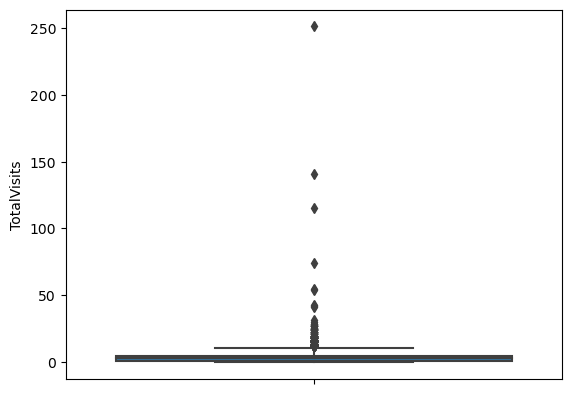

In [1223]:
# Create vertical boxplot for TotalVisits Column
sns.boxplot(y = df['TotalVisits'])
plt.show()

Maximum number of visit is 251 and 75% quantile value is 5 only. So, need to check if progress is quite sharp or gradual one by getting different quantiles.

In [1224]:
# Getting different percentiles for the TotalVisits column
np.percentile(df['TotalVisits'].dropna(), [75, 85, 90, 95, 99, 99.5, 99.9])

array([ 5.   ,  6.   ,  7.   , 10.   , 17.   , 20.86 , 31.944])

There is value close to 32 at 99.9 quantile. So, need to check how many values are more than 30 and if the number is very small compared to the size of overall dataset, then those records can be dropped.

In [1225]:
# Checking how many TotalVisits value is more than 25
temp = df[df['TotalVisits'] > 30]
temp.shape

(10, 14)

There are only 10 observations for which value is more than 30. So, those records are outliers and can change the predictions significantly in the model. So, those records are dropped.

In [1226]:
# Dropping records with TotalVisits More than 30
df = df[df['TotalVisits'] <= 30]
df.shape

(9019, 14)

In [1227]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9019.000000,9019.000000,9019.000000,9019.000000
mean,0.378534,3.362124,482.692981,2.359522
std,0.485049,3.415769,545.425814,2.083752
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,10.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,921.000000,3.000000
max,1.000000,30.000000,2272.000000,24.000000


### Total Time Spent on Website	column

In [1228]:
df["Total Time Spent on Website"].describe()

count    9019.000000
mean      482.692981
std       545.425814
min         0.000000
25%        10.000000
50%       246.000000
75%       921.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [1229]:
np.percentile(df['Total Time Spent on Website'].dropna(), [90, 95, 99])

array([1375.  , 1557.1 , 1838.64])

There seems gradual increase in this column after 75 percentile, so there is no outlier in this column.

### Page Views Per Visit column

In [1230]:
df["Page Views Per Visit"].describe()

count    9019.000000
mean        2.359522
std         2.083752
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        24.000000
Name: Page Views Per Visit, dtype: float64

In [1231]:
np.percentile(df['Page Views Per Visit'].dropna(), [90, 95, 99, 99.5, 99.9, 99.95, 100])

array([ 5.,  6.,  9., 11., 14., 15., 24.])

In [1232]:
# Checking how many values are more than 14 in Page Views Per Visit column
temp = df[df['Page Views Per Visit'] > 14]
temp.shape

(9, 14)

There are only 9 observations for which page views Per visit value is more than 14. So, these records are outliers which could create issue in scaling and can be dropped.

In [1233]:
# Remove records having Page Views Per Visit greater than 14
df = df[df['Page Views Per Visit'] <= 14]
df.shape

(9010, 14)

In [1234]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Select,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Select,Mumbai,No,Modified


## Univariate Analysis

In [1235]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Select,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Select,Mumbai,No,Modified


#### Lead Origin

In [1236]:
df["Lead Origin"].value_counts()

Landing Page Submission    4843
API                        3563
Lead Add Form               574
Lead Import                  30
Name: Lead Origin, dtype: int64

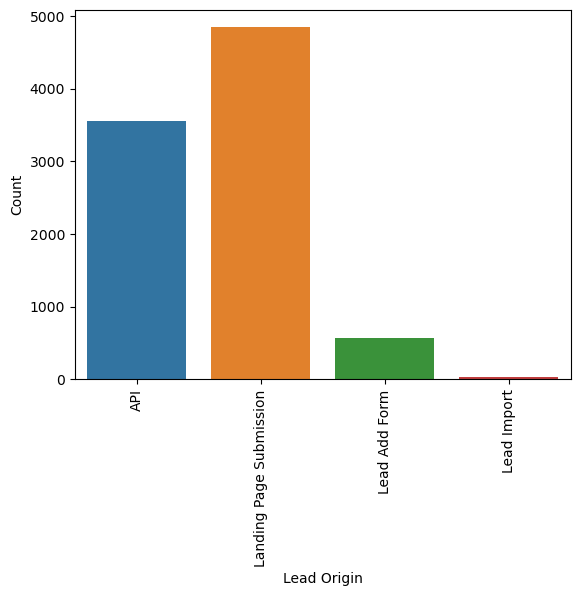

In [1237]:
# Graph for Lead Origin
sns.countplot(x = 'Lead Origin', data = df)
plt.xticks(rotation = 90)
plt.xlabel('Lead Origin')
plt.ylabel('Count')
plt.show()

For more number of persons, origin of the lead is Landing Page Submission.

#### Lead Source

In [1238]:
df["Lead Source"].value_counts()

Google              2858
Direct Traffic      2530
Olark Chat          1749
Organic Search      1149
Reference            442
Welingak Website     129
Referral Sites       122
Facebook              31
Name: Lead Source, dtype: int64

There are 2 values google and Google. Both conveys the same thing. So, google is replaced by Google in the dataset.

In [1239]:
# Replace google with Google in Lead Source
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')
df['Lead Source'].value_counts()

Google              2858
Direct Traffic      2530
Olark Chat          1749
Organic Search      1149
Reference            442
Welingak Website     129
Referral Sites       122
Facebook              31
Name: Lead Source, dtype: int64

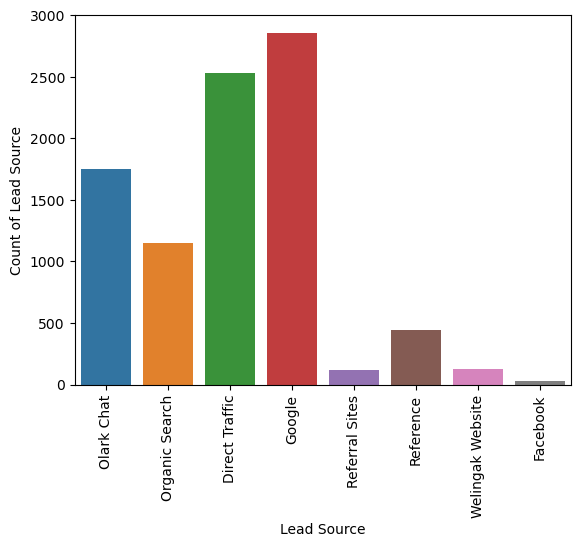

In [1240]:
sns.countplot(x = 'Lead Source', data = df)
plt.xticks(rotation = 90)
plt.xlabel('Lead Source')
plt.ylabel('Count of Lead Source')
plt.show()

Google is the Lead Souce for more number of users.

#### TotalVisits

In [1241]:
df["TotalVisits"].value_counts()

0.0     2152
2.0     1673
3.0     1300
4.0     1115
5.0      777
6.0      464
1.0      393
7.0      306
8.0      222
9.0      164
10.0     113
11.0      86
13.0      48
12.0      44
14.0      36
16.0      18
17.0      16
18.0      15
15.0      13
20.0      12
19.0       9
23.0       6
21.0       5
25.0       5
27.0       5
24.0       4
22.0       3
28.0       2
26.0       2
30.0       1
29.0       1
Name: TotalVisits, dtype: int64

In [1242]:
df["TotalVisits"].describe()

count    9010.000000
mean        3.347614
std         3.383100
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        30.000000
Name: TotalVisits, dtype: float64

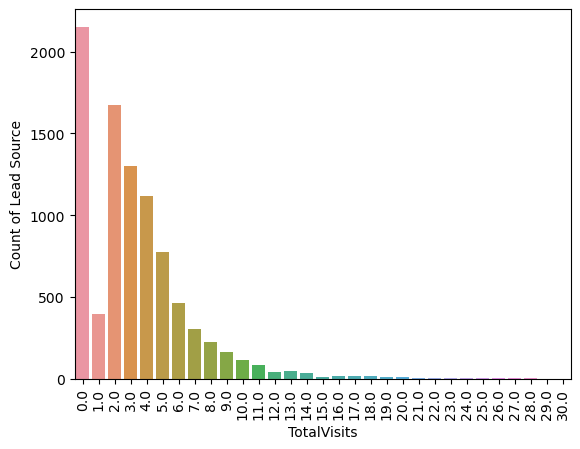

In [1243]:
sns.countplot(x = 'TotalVisits', data = df)
plt.xticks(rotation = 90)
plt.xlabel('TotalVisits')
plt.ylabel('Count of Lead Source')
plt.show()

For most of the users, number of total visits is between 0 to 9. 

#### What is your current occupation

In [1244]:
df["What is your current occupation"].value_counts()

Unemployed              5436
Working Professional     674
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

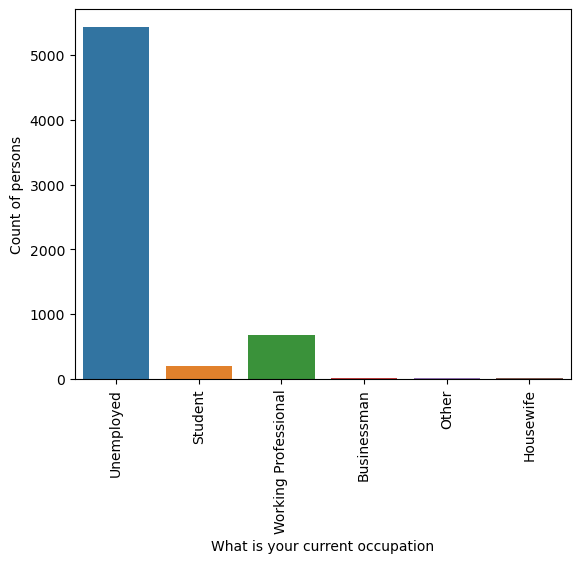

In [1245]:
sns.countplot(x = 'What is your current occupation', data = df)
plt.xticks(rotation = 90)
plt.xlabel('What is your current occupation')
plt.ylabel('Count of persons')
plt.show()

More number of people are either unemployed or working professional. 

#### Specialization

In [1246]:
df["Specialization"].value_counts()

Finance Management                   954
Human Resource Management            829
Marketing Management                 816
Operations Management                497
Business Administration              397
IT Projects Management               363
Supply Chain Management              341
Banking, Investment And Insurance    334
Travel and Tourism                   200
Media and Advertising                200
International Business               176
Healthcare Management                156
Hospitality Management               111
E-COMMERCE                           110
Retail Management                     98
Rural and Agribusiness                72
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

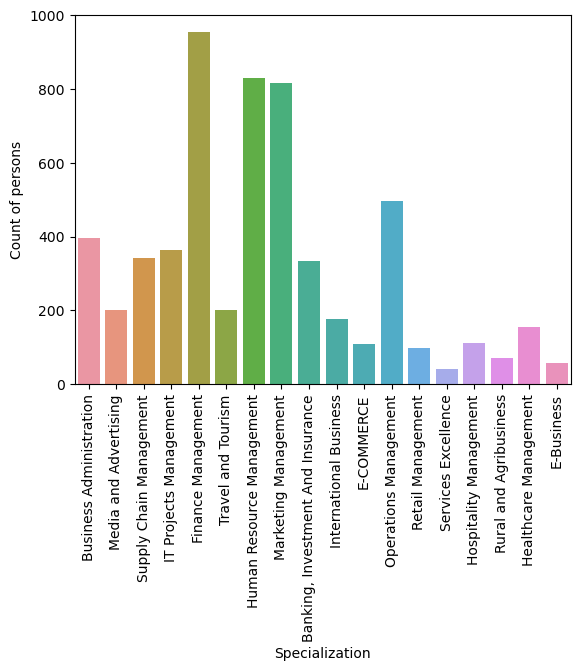

In [1247]:
sns.countplot(x = 'Specialization', data = df)
plt.xticks(rotation = 90)
plt.xlabel('Specialization')
plt.ylabel('Count of persons')
plt.show()

More number of people are from Finance or Human Resource or Marketing management.

#### Lead Profile

In [1248]:
df["Lead Profile"].value_counts()

Select                         4030
Potential Lead                 1545
Other Leads                     478
Student of SomeSchool           237
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

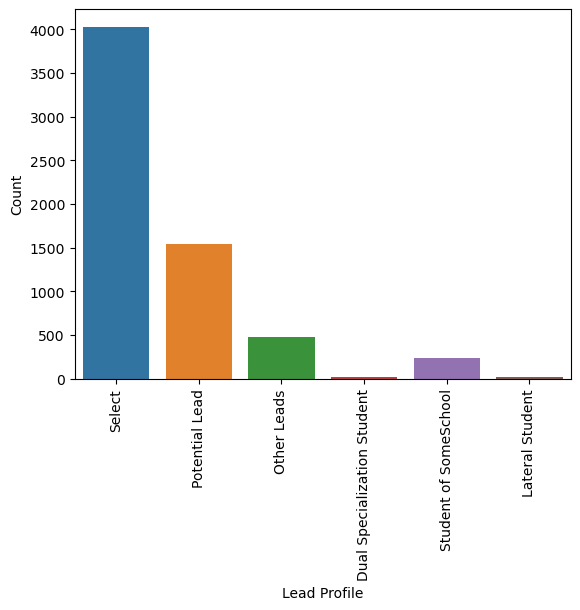

In [1249]:
sns.countplot(x = 'Lead Profile', data = df)
plt.xticks(rotation = 90)
plt.xlabel('Lead Profile')
plt.ylabel('Count')
plt.show()

There are many values as Select which is equivalent to null but value of other type may provide significant information about lead generation. So, it will be checked in bivariate analysis. 

#### City

In [1250]:
df["City"].value_counts()

Mumbai                         3156
Select                         2146
Thane & Outskirts               735
Other Cities                    673
Other Cities of Maharashtra     442
Other Metro Cities              375
Tier II Cities                   74
Name: City, dtype: int64

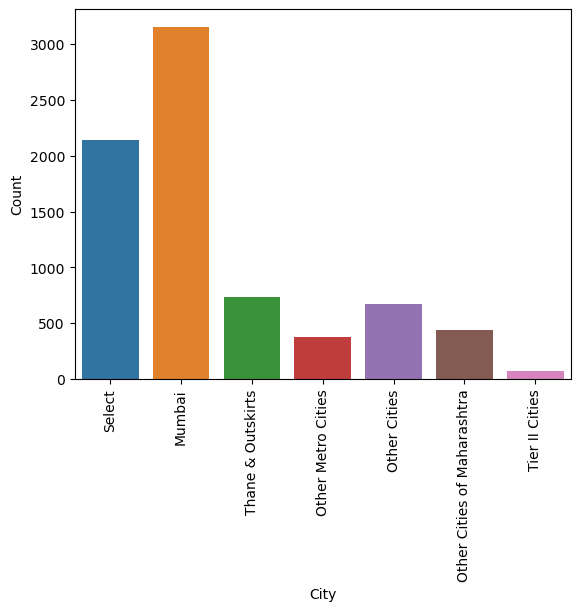

In [1251]:
sns.countplot(x = 'City', data = df)
plt.xticks(rotation = 90)
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

There are many values as Select which is equivalent to null but value of other cities may provide significant information about lead generation. So, it is kept at the moment.

## Bivariate Analysis

### Categorical - Target (Categorical) variable

#### Specialization v/s Converted

In [1252]:
df["Specialization"].isnull().sum() * 100 / len(df) 

36.17092119866815

In [1253]:
df["Specialization"].value_counts() 

Finance Management                   954
Human Resource Management            829
Marketing Management                 816
Operations Management                497
Business Administration              397
IT Projects Management               363
Supply Chain Management              341
Banking, Investment And Insurance    334
Travel and Tourism                   200
Media and Advertising                200
International Business               176
Healthcare Management                156
Hospitality Management               111
E-COMMERCE                           110
Retail Management                     98
Rural and Agribusiness                72
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

After replacing null values by Select, it is checked further.

In [1254]:
# Replace Null with Select in specialization
df['Specialization'] = df['Specialization'].fillna('Select')

In [1255]:
df.groupby("Specialization")["Converted"].mean()

Specialization
Banking, Investment And Insurance    0.491018
Business Administration              0.440806
E-Business                           0.368421
E-COMMERCE                           0.354545
Finance Management                   0.441300
Healthcare Management                0.487179
Hospitality Management               0.405405
Human Resource Management            0.452352
IT Projects Management               0.382920
International Business               0.352273
Marketing Management                 0.481618
Media and Advertising                0.410000
Operations Management                0.470825
Retail Management                    0.346939
Rural and Agribusiness               0.430556
Select                               0.274624
Services Excellence                  0.275000
Supply Chain Management              0.422287
Travel and Tourism                   0.355000
Name: Converted, dtype: float64

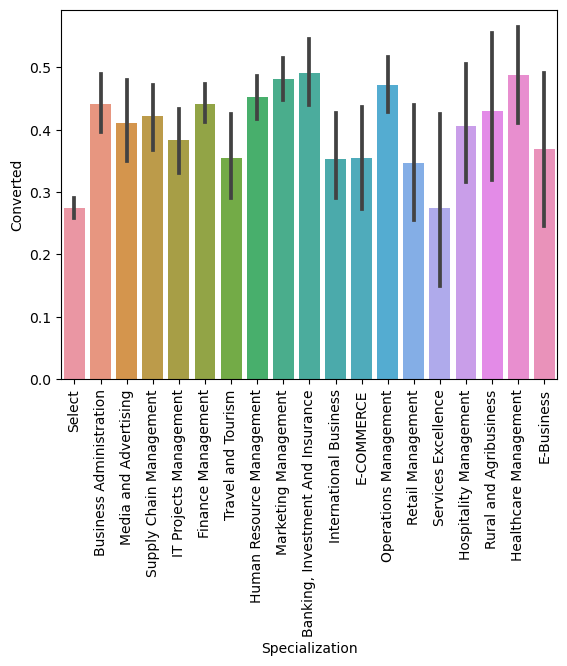

In [1256]:
sns.barplot(x="Specialization", y="Converted", data=df)
plt.xticks(rotation=90)
plt.xlabel("Specialization")
plt.ylabel("Converted")
plt.show()

After replacing the null value with Select, it is clear that person who hasn't specified his/her Specialization has low chance of conversion. So, it may not be the case of missing value at random. So, despite having around 36% missing value, this column is not deleted.

#### Lead Origin v/s Converted

In [1257]:
df["Lead Origin"].value_counts()

Landing Page Submission    4843
API                        3563
Lead Add Form               574
Lead Import                  30
Name: Lead Origin, dtype: int64

In [1258]:
df.groupby("Lead Origin")["Converted"].mean()

Lead Origin
API                        0.311535
Landing Page Submission    0.362379
Lead Add Form              0.937282
Lead Import                0.300000
Name: Converted, dtype: float64

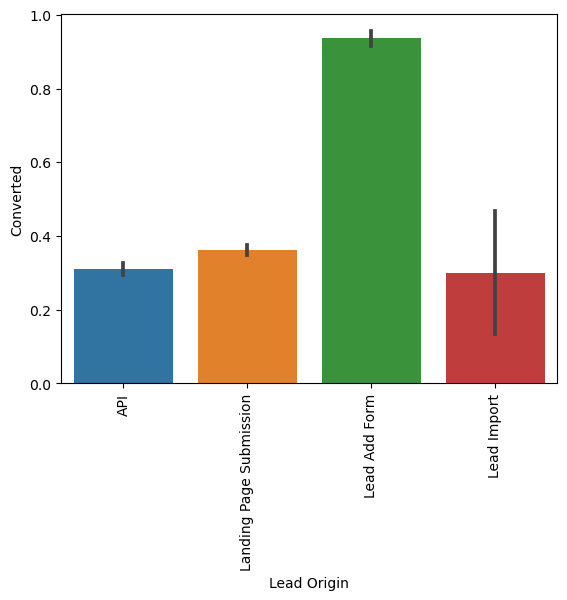

In [1259]:
sns.barplot(x="Lead Origin", y="Converted", data=df)
plt.xticks(rotation=90)
plt.xlabel("Lead Origin")
plt.ylabel("Converted")
plt.show()

When Lead Origin is "Lead Add Form" there is very high chance of conversion which is close to 93%. So, this variable maybe given more importance in model building.

#### Lead Source v/s Converted

In [1260]:
df.groupby("Lead Source")["Converted"].mean()

Lead Source
Direct Traffic      0.321739
Facebook            0.290323
Google              0.400280
Olark Chat          0.254431
Organic Search      0.376849
Reference           0.925339
Referral Sites      0.254098
Welingak Website    0.984496
Name: Converted, dtype: float64

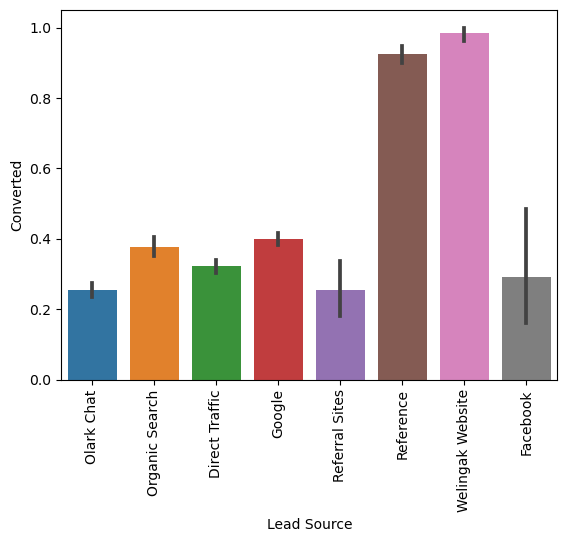

In [1261]:
sns.barplot(x="Lead Source", y="Converted", data=df)
plt.xticks(rotation=90)
plt.xlabel("Lead Source")
plt.ylabel("Converted")
plt.show()

There is very high percentage of conversion rate when source of Lead is either through reference or through Welingak website.

#### Do Not Email v/s Converted

In [1262]:
df["Do Not Email"].value_counts()

No     8309
Yes     701
Name: Do Not Email, dtype: int64

In [1263]:
df.groupby("Do Not Email")["Converted"].mean()

Do Not Email
No     0.398363
Yes    0.145506
Name: Converted, dtype: float64

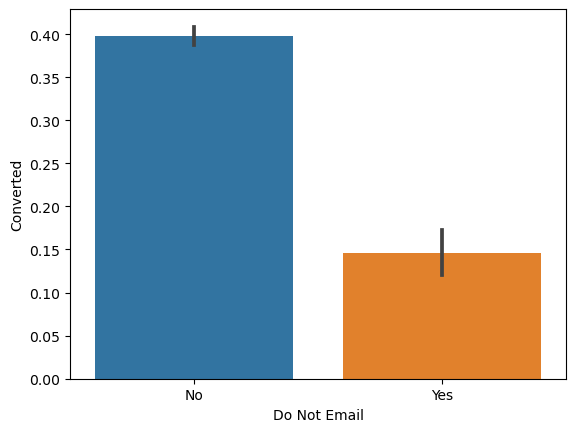

In [1264]:
sns.barplot(x="Do Not Email", y="Converted", data=df)
plt.xlabel("Do Not Email")
plt.ylabel("Converted")
plt.show()

Person who doesn't opt for do not email has higher conversion rate compared to person who choose not to receive email which seems logical.

#### Last Activity v/s Converted

In [1265]:
df['Last Activity'].value_counts()

Email Opened                 3419
SMS Sent                     2708
Olark Chat Conversation       970
Page Visited on Website       621
Converted to Lead             426
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    88
Unsubscribed                   58
Had a Phone Conversation       25
Name: Last Activity, dtype: int64

In [1266]:
df.groupby("Last Activity")["Converted"].mean()

Last Activity
Converted to Lead            0.126761
Email Bounced                0.051282
Email Link Clicked           0.273408
Email Opened                 0.364434
Form Submitted on Website    0.241379
Had a Phone Conversation     0.800000
Olark Chat Conversation      0.085567
Page Visited on Website      0.238325
SMS Sent                     0.628139
Unreachable                  0.329545
Unsubscribed                 0.241379
Name: Converted, dtype: float64

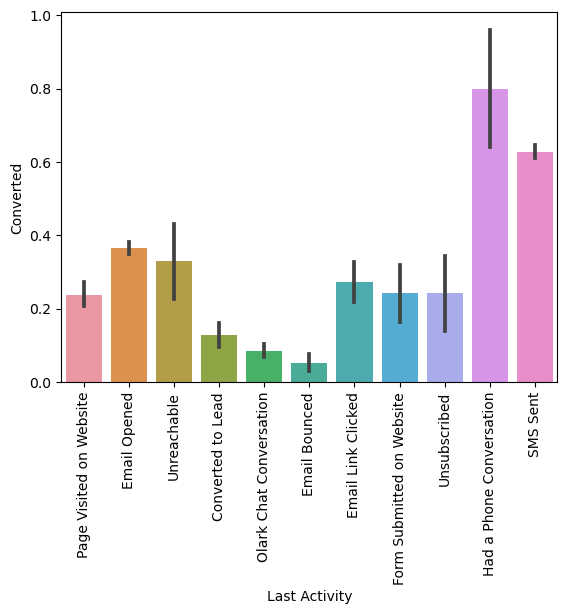

In [1267]:
sns.barplot(x="Last Activity", y="Converted", data=df)
plt.xlabel("Last Activity")
plt.ylabel("Converted")
plt.xticks(rotation=90)
plt.show()

When user had a phone conversation then there is very high change that lead is converted and on the other hand, when email is bounced, then there is very low chance of conversion.

#### What is your current occupation v/s Converted

In [1268]:
df["What is your current occupation"].isnull().sum() * 100 / len(df)

29.544950055493896

There are around 29% missing values, which is replace with Select to check what percentage of conversion is there when value is missing.

In [1269]:
# Replace null value with Select in column What is your current occupation	
df["What is your current occupation"].fillna("Select", inplace = True)

In [1270]:
df["What is your current occupation"].value_counts()

Unemployed              5436
Select                  2662
Working Professional     674
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [1271]:
df.groupby("What is your current occupation")["Converted"].mean()

What is your current occupation
Businessman             0.625000
Housewife               1.000000
Other                   0.600000
Select                  0.137866
Student                 0.359223
Unemployed              0.428256
Working Professional    0.919881
Name: Converted, dtype: float64

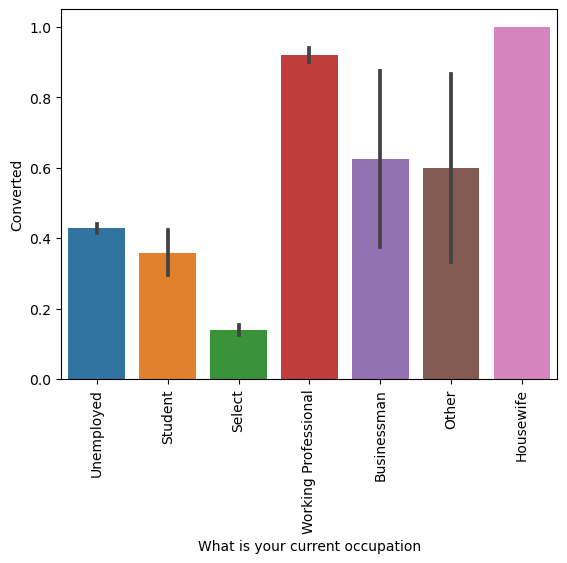

In [1272]:
sns.barplot(x="What is your current occupation", y="Converted", data=df)
plt.xticks(rotation=90)
plt.xlabel("What is your current occupation")
plt.ylabel("Converted")
plt.show()

It is clear from the mean value that when the detail of current occupation is less, there is very low chance of conversion (Close to 13% only) and for housewife and working professional, conversion chance is very high.

#### Lead Profile v/s Converted

In [1273]:
df["Lead Profile"].isnull().sum() * 100 / len(df)

29.733629300776915

In [1274]:
df["Lead Profile"].value_counts()

Select                         4030
Potential Lead                 1545
Other Leads                     478
Student of SomeSchool           237
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1275]:
# Replacing null values with Select for Lead Profile
df['Lead Profile'] = df['Lead Profile'].replace(np.nan, 'Select')
df['Lead Profile'].value_counts(normalize=True)

Select                         0.744617
Potential Lead                 0.171476
Other Leads                    0.053052
Student of SomeSchool          0.026304
Lateral Student                0.002331
Dual Specialization Student    0.002220
Name: Lead Profile, dtype: float64

With these change, there are around 74% missing values in this column. Let's check if it has any relation with conversion rate.

In [1276]:
df.groupby("Lead Profile")["Converted"].mean()

Lead Profile
Dual Specialization Student    1.000000
Lateral Student                1.000000
Other Leads                    0.370293
Potential Lead                 0.780583
Select                         0.295126
Student of SomeSchool          0.033755
Name: Converted, dtype: float64

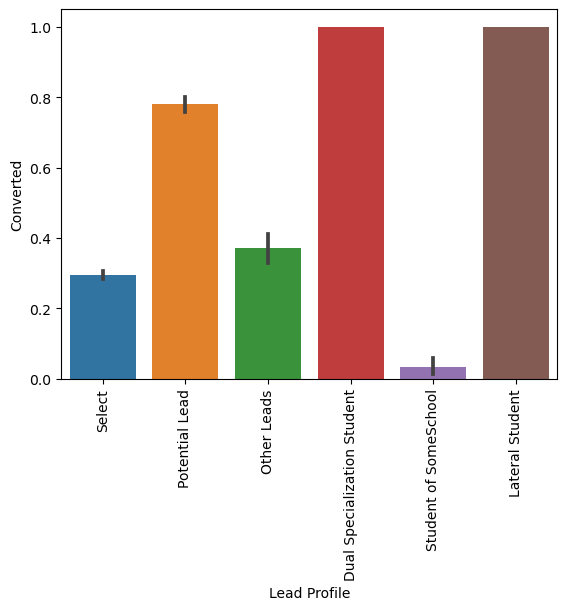

In [1277]:
sns.barplot(x="Lead Profile", y="Converted", data=df)
plt.xticks(rotation=90)
plt.xlabel("Lead Profile")
plt.ylabel("Converted")
plt.show()

So, even though there are around 74% missing values, other 26% values can provide more useful information. Because for dual specialization and lateral student conversion rate is 100%. And for student of some school, conversion rate is very low (Close to 3%). Also, for select value, conversion rate is very low. So, this column provides useful information.

#### City v/s Converted

In [1278]:
df.groupby("City")["Converted"].mean()

City
Mumbai                         0.401774
Other Cities                   0.402675
Other Cities of Maharashtra    0.441176
Other Metro Cities             0.408000
Select                         0.474837
Thane & Outskirts              0.447619
Tier II Cities                 0.337838
Name: Converted, dtype: float64

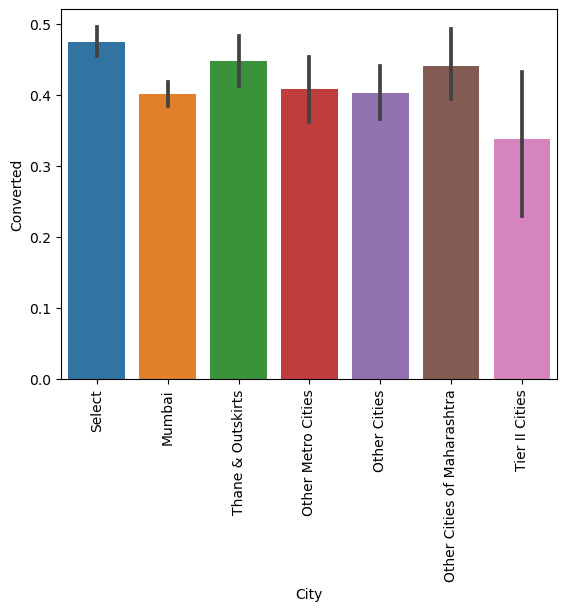

In [1279]:
sns.barplot(x="City", y="Converted", data=df)
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Converted")
plt.show()

It seems that value of city doesn't make that much difference in terms of conversion rate, but it is still kept in the dataset. Later on, it may be removed in model selection.

#### A free copy of Mastering The Interview	v/s Converted

In [1280]:
df.groupby("A free copy of Mastering The Interview")["Converted"].mean()

A free copy of Mastering The Interview
No     0.388925
Yes    0.356794
Name: Converted, dtype: float64

There is not much difference in conversion rate based on whether free copy of mastering interview value is Yes or No

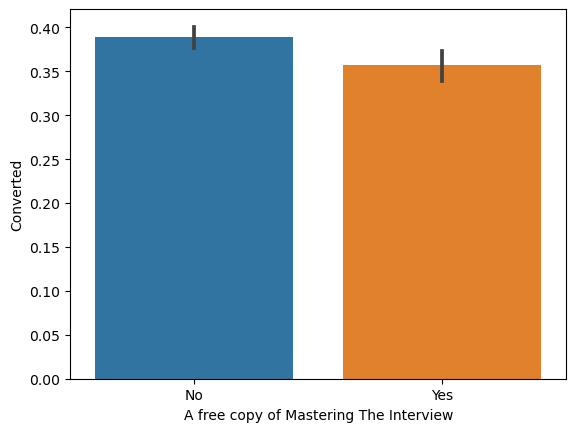

In [1281]:
sns.barplot(x="A free copy of Mastering The Interview", y="Converted", data=df)
plt.xlabel("A free copy of Mastering The Interview")
plt.ylabel("Converted")
plt.show()

#### Last Notable Activity v/s Converted

In [1282]:
df["Last Notable Activity"].value_counts()

Modified                     3235
Email Opened                 2811
SMS Sent                     2146
Page Visited on Website       311
Olark Chat Conversation       183
Email Link Clicked            173
Email Bounced                  60
Unsubscribed                   44
Unreachable                    32
Had a Phone Conversation       14
Form Submitted on Website       1
Name: Last Notable Activity, dtype: int64

In [1283]:
df.groupby("Last Notable Activity")["Converted"].mean()

Last Notable Activity
Email Bounced                0.150000
Email Link Clicked           0.260116
Email Opened                 0.369264
Form Submitted on Website    0.000000
Had a Phone Conversation     0.928571
Modified                     0.207728
Olark Chat Conversation      0.136612
Page Visited on Website      0.292605
SMS Sent                     0.691985
Unreachable                  0.687500
Unsubscribed                 0.272727
Name: Converted, dtype: float64

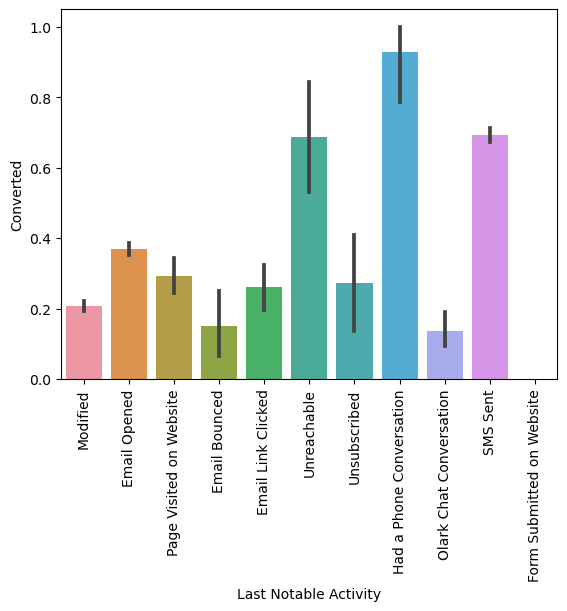

In [1284]:
sns.barplot(x="Last Notable Activity", y="Converted", data=df)
plt.xticks(rotation=90)
plt.xlabel("Last Notable Activity")
plt.ylabel("Converted")
plt.show()

In case of having last notable activity as having a phone conversation or senting SMS, conversion rate is high.

### Numerical - Target (Categorical) variable

#### TotalVisits v/s Converted

In [1285]:
df.groupby("Converted")["TotalVisits"].mean()

Converted
0    3.208646
1    3.575615
Name: TotalVisits, dtype: float64

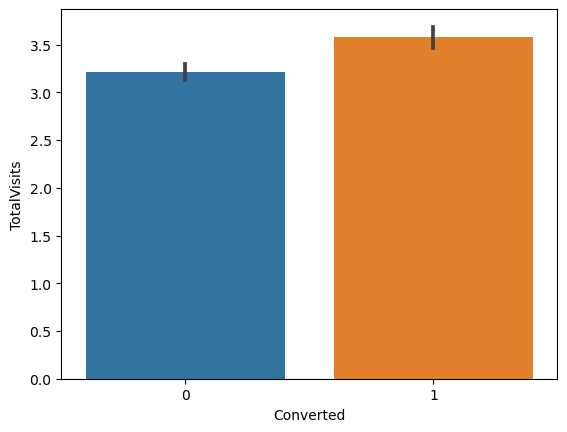

In [1286]:
sns.barplot(x="Converted", y="TotalVisits", data=df)
plt.xlabel("Converted")
plt.ylabel("TotalVisits")
plt.show()

In [1287]:
df.groupby("Converted")["TotalVisits"].median()

Converted
0    3.0
1    3.0
Name: TotalVisits, dtype: float64

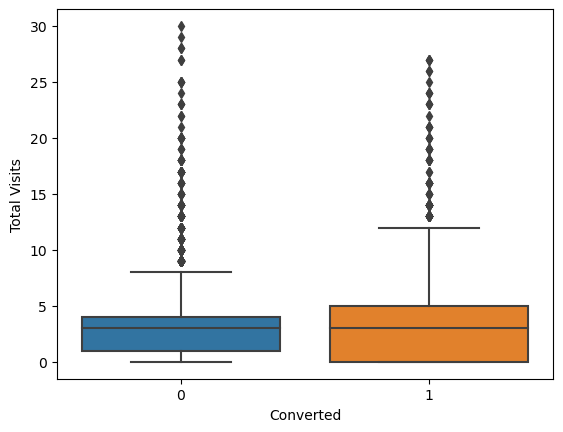

In [1288]:
sns.boxplot(x=df["Converted"], y=df["TotalVisits"])
plt.xlabel("Converted")
plt.ylabel("Total Visits")
plt.show()

There is not huge difference in average value of total visits wheather lead is converted or not whereas median is same in both case.

#### Total Time Spent on Website v/s Converted

In [1289]:
df.groupby("Converted")["Total Time Spent on Website"].mean()

Converted
0    329.366381
1    733.531067
Name: Total Time Spent on Website, dtype: float64

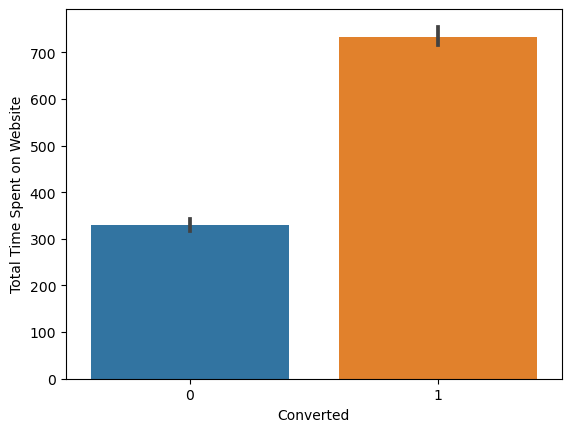

In [1290]:
sns.barplot(x="Converted", y="Total Time Spent on Website", data=df)
plt.xlabel("Converted")
plt.ylabel("Total Time Spent on Website")
plt.show()

In [1291]:
df.groupby("Converted")["Total Time Spent on Website"].median()

Converted
0    178.0
1    826.5
Name: Total Time Spent on Website, dtype: float64

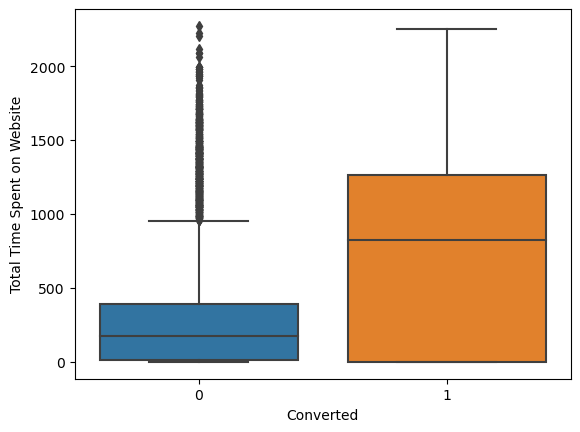

In [1292]:
sns.boxplot(x=df["Converted"], y=df["Total Time Spent on Website"])
plt.xlabel("Converted")
plt.ylabel("Total Time Spent on Website")
plt.show()

Average amount of total time spent on website is very high when lead is converted successfully compared to non-conversion.

#### Page Views Per Visit v/s Converted

In [1293]:
df.groupby("Converted")["Page Views Per Visit"].mean()

Converted
0    2.334895
1    2.363215
Name: Page Views Per Visit, dtype: float64

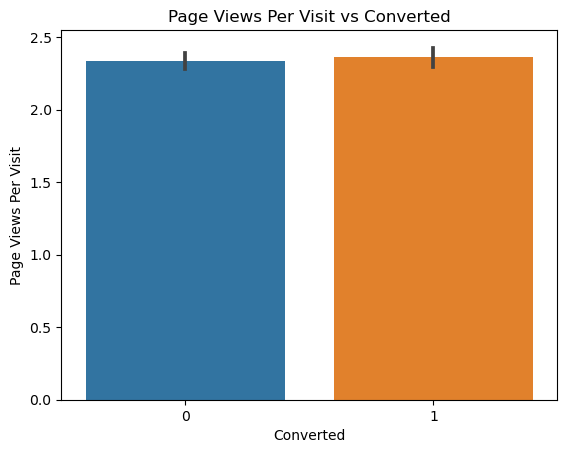

In [1294]:
sns.barplot(x="Converted", y="Page Views Per Visit", data=df)
plt.xlabel("Converted")
plt.ylabel("Page Views Per Visit")
plt.title("Page Views Per Visit vs Converted")
plt.show()

In [1295]:
df.groupby("Converted")["Page Views Per Visit"].median()

Converted
0    2.0
1    2.0
Name: Page Views Per Visit, dtype: float64

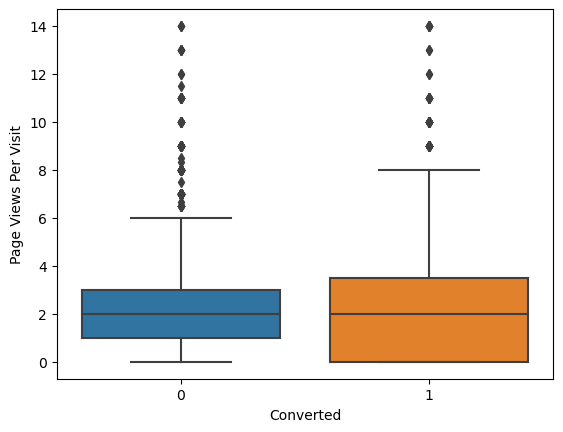

In [1296]:
sns.boxplot(x=df["Converted"], y=df["Page Views Per Visit"])
plt.xlabel("Converted")
plt.ylabel("Page Views Per Visit")
plt.show()

Median is same and average of Page Views Per Visit is also very similar for both converted and non-converted. There isn't much difference in boxplot of both as well. 

## Multivariate Analysis

### Finding correlation matrix

In [1297]:
df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.052618,0.359498,0.006748
TotalVisits,0.052618,1.000000,0.314610,0.675127
Total Time Spent on Website,0.359498,0.314610,1.000000,0.334101
Page Views Per Visit,0.006748,0.675127,0.334101,1.000000


There is high correlation between Page Views Per Visit and TotalVisits. 

### 3 variable correlations

#### Lead Origin and Lead Source v/s Converted

In [1298]:
res = pd.pivot_table(df, index=['Lead Origin'], columns="Lead Source", values="Converted", aggfunc=np.mean)
res 

Lead Source,Direct Traffic,Facebook,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website
Lead Origin,,,,,,,,
API,0.354545,NaN,0.376083,0.25415,0.384615,NaN,0.185567,NaN
Landing Page Submission,0.320248,0.0,0.416324,NaN,0.371758,NaN,0.520000,NaN
Lead Add Form,NaN,NaN,1.000000,0.50000,NaN,0.925339,NaN,0.984496
Lead Import,NaN,0.3,NaN,NaN,NaN,NaN,NaN,NaN


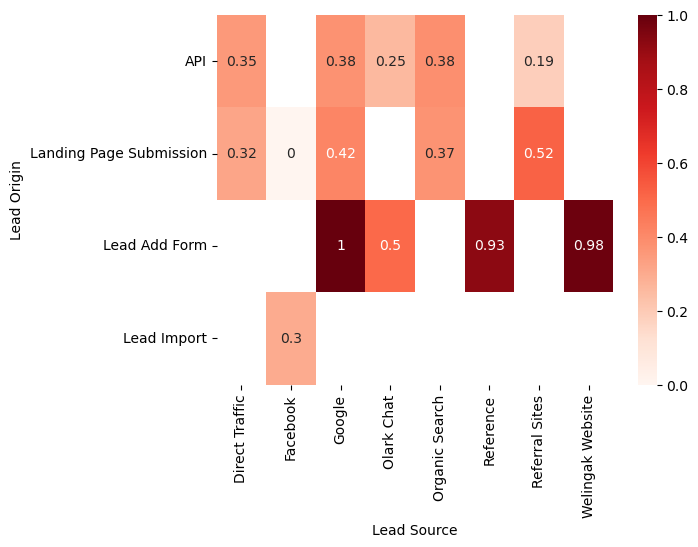

In [1299]:
sns.heatmap(res, cmap="Reds", annot=True)
plt.show()

There 100% conversion, when Origin of lead is through Lead Add Form and Source of Lead is Google. 

#### Lead Origin and Lead Source v/s Converted

In [1300]:
res = pd.pivot_table(df, index=['Lead Origin'], columns="Lead Profile", values="Converted", aggfunc=np.mean)
res

Lead Profile,Dual Specialization Student,Lateral Student,Other Leads,Potential Lead,Select,Student of SomeSchool
Lead Origin,,,,,,
API,1.0,1.0,0.267176,0.725995,0.258925,0.019231
Landing Page Submission,1.0,1.0,0.369906,0.740514,0.283867,0.037879
Lead Add Form,NaN,1.0,0.888889,0.969388,0.901639,1.000000
Lead Import,NaN,NaN,0.000000,0.857143,0.136364,NaN


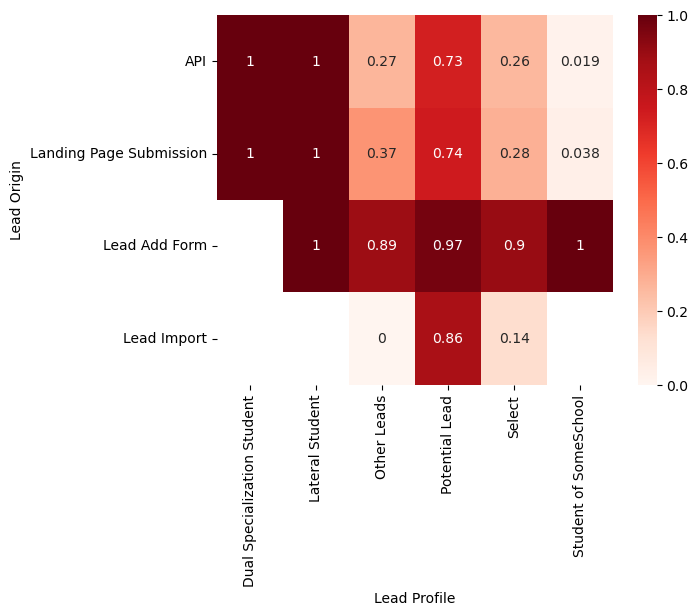

In [1301]:
sns.heatmap(res, cmap="Reds", annot=True)
plt.show()

For Dual Specialization student and lateral students, conversion rate is 100%. Conversion rate is also high when Lead origin is lead add form.

#### Lead Source and Lead Profile v/s Converted

In [1302]:
res = pd.pivot_table(df, index=['Lead Source'], columns="Lead Profile", values="Converted", aggfunc=np.mean)
res

Lead Profile,Dual Specialization Student,Lateral Student,Other Leads,Potential Lead,Select,Student of SomeSchool
Lead Source,,,,,,
Direct Traffic,1.0,1.0,0.386503,0.671756,0.254860,0.044643
Facebook,NaN,NaN,0.000000,0.857143,0.130435,NaN
Google,1.0,1.0,0.290909,0.805726,0.320913,0.000000
Olark Chat,1.0,1.0,0.318182,0.645570,0.218687,0.030303
Organic Search,1.0,1.0,0.347222,0.750000,0.297454,0.000000
Reference,NaN,1.0,0.888889,0.968421,0.830645,1.000000
Referral Sites,NaN,NaN,0.500000,0.916667,0.163462,NaN
Welingak Website,NaN,1.0,NaN,1.000000,0.983051,NaN


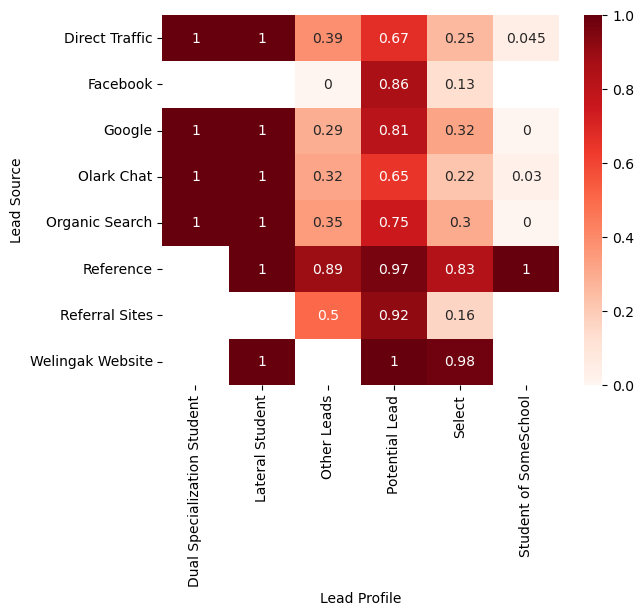

In [1303]:
sns.heatmap(res, cmap="Reds", annot=True)
plt.show()

Conversion rate is 100% for Dual specialization students and lateral students. When source of lead is through reference or welingak website, conversion rate is very high. There is 0% conversion rate for student of some school when source of lead is through organic search.

#### Specialization and What is your current occupation	v/s Converted

In [1304]:
res = pd.pivot_table(df, index=['Specialization'], columns="What is your current occupation", values="Converted", aggfunc=np.mean)
res

What is your current occupation,Businessman,Housewife,Other,Select,Student,Unemployed,Working Professional
Specialization,,,,,,,
"Banking, Investment And Insurance",NaN,NaN,NaN,0.188406,0.642857,0.506849,0.968750
Business Administration,0.0,1.0,0.666667,0.183908,0.500000,0.433071,0.955556
E-Business,NaN,NaN,NaN,0.357143,1.000000,0.350000,0.500000
E-COMMERCE,1.0,NaN,NaN,0.193548,1.000000,0.342857,1.000000
Finance Management,NaN,1.0,0.000000,0.169014,0.652174,0.438424,0.952381
Healthcare Management,1.0,1.0,1.000000,0.147059,0.857143,0.449438,0.956522
Hospitality Management,NaN,NaN,NaN,0.190476,0.250000,0.367647,0.833333
Human Resource Management,NaN,1.0,1.000000,0.200000,0.555556,0.445872,0.913978
IT Projects Management,0.0,NaN,NaN,0.113636,0.333333,0.399142,0.971429


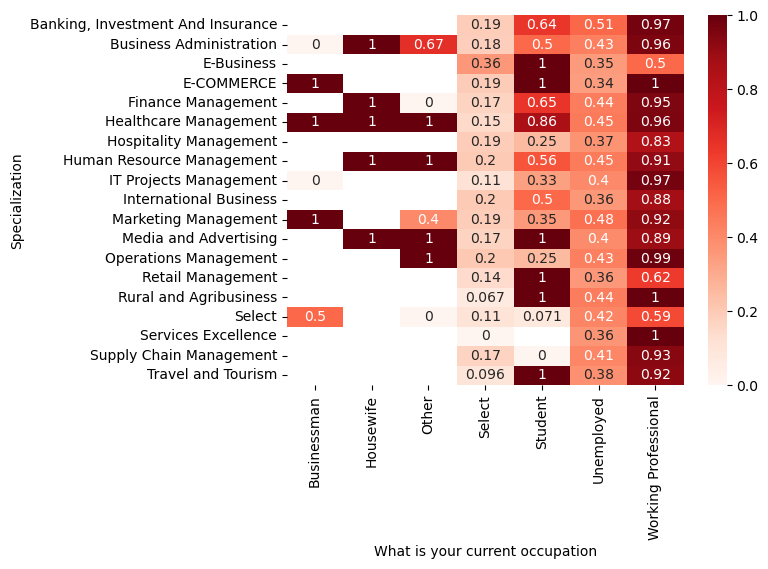

In [1305]:
sns.heatmap(res, cmap="Reds", annot=True)
plt.show()

Conversion rate is very low when occupation is "Select" means occupation is not declared by user. And for working professional, generally conversion rate is high.

#### Do Not Email and A free copy of Mastering The Interview v/s Converted

In [1306]:
res = pd.pivot_table(df, index=['Do Not Email'], columns="A free copy of Mastering The Interview", values="Converted", aggfunc=np.mean)
res

A free copy of Mastering The Interview,No,Yes
Do Not Email,,
No,0.404051,0.385747
Yes,0.179177,0.097222


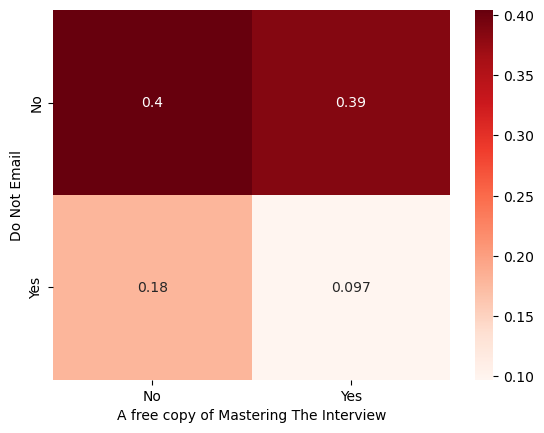

In [1307]:
sns.heatmap(res, cmap="Reds", annot=True)
plt.show()

When user preferred not to receiev Email and also has free copy of mastering the interview, then conversion rate is low.

#### City and What is your current occupation v/s Converted

In [1308]:
res = pd.pivot_table(df, index=['City'], columns="What is your current occupation", values="Converted", aggfunc=np.mean)
res

What is your current occupation,Businessman,Housewife,Other,Select,Student,Unemployed,Working Professional
City,,,,,,,
Mumbai,0.00,1.0,0.625,0.169655,0.494505,0.415908,0.928571
Other Cities,1.00,1.0,1.000,0.170886,0.583333,0.411765,0.894737
Other Cities of Maharashtra,NaN,NaN,NaN,0.144231,0.181818,0.487805,0.950000
Other Metro Cities,NaN,NaN,1.000,0.197674,0.555556,0.412245,0.852941
Select,0.75,NaN,0.250,NaN,0.112676,0.427083,0.938272
Thane & Outskirts,0.00,1.0,NaN,0.176101,0.583333,0.484190,0.854545
Tier II Cities,1.00,NaN,NaN,0.238095,NaN,0.288889,0.857143


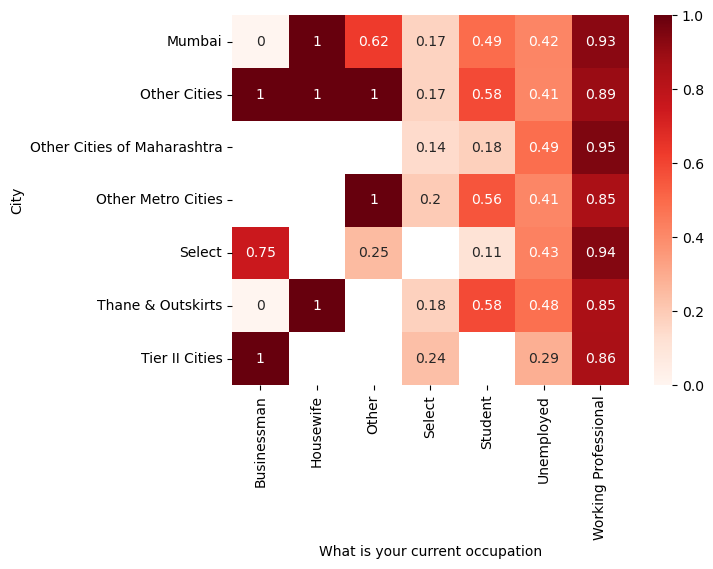

In [1309]:
sns.heatmap(res, cmap="Reds", annot=True)
plt.show()

For working professional, generally the conversion rate is higher. And when occupation is "Select" which means occupation is not declared, then conversion rate is very low.

# Step - 3: Pre-preprocessing the data for Model Building

## Creating Dummy Variables for Categorical Columns

### Getting all Categorical columns

In [1310]:
categorical_cols= df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

### Converting binary columns to 0 and 1

In [1311]:
# Replace yes with 1 and no with 0 in Do Not Email
df['Do Not Email'] = df['Do Not Email'].replace({'Yes': 1, 'No': 0})
df["A free copy of Mastering The Interview"] = df["A free copy of Mastering The Interview"].replace({'Yes': 1, 'No': 0})
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,Select,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,Select,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Potential Lead,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Select,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Select,Mumbai,0,Modified


### Getting dummy variables for other categorical columns

#### Last Activity column

In [1312]:
df["Last Activity"].value_counts()

Email Opened                 3419
SMS Sent                     2708
Olark Chat Conversation       970
Page Visited on Website       621
Converted to Lead             426
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    88
Unsubscribed                   58
Had a Phone Conversation       25
Name: Last Activity, dtype: int64

In [1313]:
# Create dummy variable for Last Activity column
df = pd.get_dummies(df, columns=['Last Activity'], drop_first=True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,API,Olark Chat,0,0,0.0,0,0.0,Select,Unemployed,Select,...,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Select,Unemployed,Select,...,0,0,1,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Potential Lead,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Select,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Select,Unemployed,Select,...,0,0,0,0,0,0,0,0,0,0


#### Specialization 

In [1314]:
# Create dummy variable for Specialization and drop column with value Select
df = pd.get_dummies(df, columns=['Specialization'])
df.drop(['Specialization_Select'], axis=1, inplace=True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Profile,City,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,Select,Select,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,Select,Select,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,Potential Lead,Mumbai,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,Select,Mumbai,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,Select,Mumbai,...,0,0,0,0,0,0,0,0,0,0


#### Lead Origin and Lead Source

In [1315]:
df["Lead Source"].value_counts()

Google              2858
Direct Traffic      2530
Olark Chat          1749
Organic Search      1149
Reference            442
Welingak Website     129
Referral Sites       122
Facebook              31
Name: Lead Source, dtype: int64

In [1316]:
df["Lead Origin"].value_counts()

Landing Page Submission    4843
API                        3563
Lead Add Form               574
Lead Import                  30
Name: Lead Origin, dtype: int64

In [1317]:
# Create dummy variables for Lead Origin and Lead Source
df = pd.get_dummies(df, columns=['Lead Origin', 'Lead Source'], drop_first=True)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,...,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,0,0,0.0,0,0.0,Unemployed,Select,Select,0,Modified,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,Unemployed,Select,Select,0,Email Opened,...,0,0,0,0,0,0,1,0,0,0
2,0,1,2.0,1532,2.0,Student,Potential Lead,Mumbai,1,Email Opened,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,Unemployed,Select,Mumbai,0,Modified,...,1,0,0,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,Unemployed,Select,Mumbai,0,Modified,...,1,0,0,0,1,0,0,0,0,0


#### What is your current occupation

In [1318]:
df["What is your current occupation"].value_counts()

Unemployed              5436
Select                  2662
Working Professional     674
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [1319]:
# Create dummy variable for What is your current occupation and drop Select column
df = pd.get_dummies(df, columns=['What is your current occupation'], prefix='occupation')
df.drop(['occupation_Select'], axis=1, inplace=True)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Last Activity_Email Bounced,...,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional
0,0,0,0.0,0,0.0,Select,Select,0,Modified,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,Select,Select,0,Email Opened,0,...,1,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,Potential Lead,Mumbai,1,Email Opened,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,Select,Mumbai,0,Modified,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,Select,Mumbai,0,Modified,0,...,0,0,0,0,0,0,0,0,1,0


#### Lead Profile

In [1320]:
df["Lead Profile"].value_counts()

Select                         6709
Potential Lead                 1545
Other Leads                     478
Student of SomeSchool           237
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1321]:
# Create dummy variables for Lead Profile and delete Select value
df = pd.get_dummies(df, columns=['Lead Profile'])
df.drop(['Lead Profile_Select'], axis=1, inplace=True)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City,A free copy of Mastering The Interview,Last Notable Activity,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
0,0,0,0.0,0,0.0,Select,0,Modified,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,Select,0,Email Opened,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,Mumbai,1,Email Opened,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1.0,305,1.0,Mumbai,0,Modified,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,Mumbai,0,Modified,0,0,...,0,0,0,1,0,0,0,0,0,0


#### City

In [1322]:
df["City"].value_counts()

Mumbai                         3156
Select                         2146
Thane & Outskirts               735
Other Cities                    673
Other Cities of Maharashtra     442
Other Metro Cities              375
Tier II Cities                   74
Name: City, dtype: int64

In [1323]:
# Create dummy variable for City and delete Select
df = pd.get_dummies(df, columns=['City'])
df.drop(['City_Select'], axis=1, inplace=True)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,...,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,Modified,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,Email Opened,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,Email Opened,0,0,1,...,0,0,1,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,Modified,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,Modified,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Last Notable Activity

In [1324]:
df["Last Notable Activity"].value_counts()

Modified                     3235
Email Opened                 2811
SMS Sent                     2146
Page Visited on Website       311
Olark Chat Conversation       183
Email Link Clicked            173
Email Bounced                  60
Unsubscribed                   44
Unreachable                    32
Had a Phone Conversation       14
Form Submitted on Website       1
Name: Last Notable Activity, dtype: int64

In [1325]:
# Creating dummy variables for Last Notable Activity
df = pd.get_dummies(df, columns=['Last Notable Activity'], drop_first=True)
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Splitting data into train and test

In [1326]:
# Importing library for train and test split
from sklearn.model_selection import train_test_split

In [1327]:
# Checking null values in the dataset
df.isnull().sum()

Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
                                                ..
Last Notable Activity_Olark Chat Conversation    0
Last Notable Activity_Page Visited on Website    0
Last Notable Activity_SMS Sent                   0
Last Notable Activity_Unreachable                0
Last Notable Activity_Unsubscribed               0
Length: 71, dtype: int64

In [1328]:
# Getting target variable
y = df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1329]:
# Getting independent variables 
X = df.drop(["Converted"], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [1330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [1331]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6307, 70)
(2703, 70)
(6307,)
(2703,)


## Scaling of Data

In [1332]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
6825,0,0.066667,0.532570,0.142857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6612,1,0.166667,0.130282,0.357143,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4958,0,0.166667,0.203785,0.357143,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6045,0,0.266667,0.042254,0.190714,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
7946,1,0.066667,0.067782,0.142857,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step - 4: Building the model

## Creating model with Automated RFE

### Model - 1 with 40 features

In [1333]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [1334]:
def build_model(number_of_features):
    rfe = RFE(logreg, n_features_to_select=40)
    rfe = rfe.fit(X_train, y_train)
    print(rfe.support_)

[ True  True  True  True False False  True  True  True  True  True  True
  True False  True False False False False False False False False False
  True False False False  True  True False False False False  True  True
  True  True  True False  True False  True False  True  True  True  True
  True  True  True  True  True  True False False False False False False
  True  True False  True  True  True  True False  True  True]


In [1335]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 28),
 ('Last Activity_Email Bounced', False, 25),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 12),
 ('Last Activity_Unsubscribed', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 21),
 ('Specialization_E-Business', False, 24),
 ('Specialization_E-COMMERCE', False, 4),
 ('Specialization_Finance Management', False, 15),
 ('Specialization_Healthcare Management', False, 29),
 ('Specialization_Hospita

In [1336]:
col = X_train.columns[rfe.support_]

In [1337]:
X_train = X_train[col]

In [1338]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6267
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2322.3
Date:                Sat, 12 Aug 2023   Deviance:                       4644.5
Time:                        11:06:42   Pearson chi2:                 6.46e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4443
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.3374      0.263    -12.679      0.000      -3.853      -2.822
Do Not Email                                      -1.5026      0.211     -7.121      0.000      -1.916      -1.089
TotalVisits                                        2.1644      0.464      4.666      0.000       1.255       3.074
Total Time Spent on Website                        4.5750      0.179     25.544      0.000       4.224       4.926
Page Views Per Visit                              -1.2809      0.381     -3.361      0.001      -2.028      -0.534
Last Activity_Email Link Clicked                   0.7120      0.426      1.673      0.094      -0.122       1.546
Last Activity_Email Opened                         0.9129      0.231      3.960      0.000       0.461       1.365
Last Activity_Form Submitted on Website            0.4739      0.383      1.238      0.216      -0.276       1.224
Last Activity_Had a Phone Conversation             2.5873      0.913      2.833      0.005       0.797       4.377
Last Activity_Olark Chat Conversation             -0.4058      0.267     -1.521      0.128      -0.929       0.117
Last Activity_Page Visited on Website              0.5376      0.289      1.861      0.063      -0.029       1.104
Last Activity_SMS Sent                             1.3891      0.224      6.198      0.000       0.950       1.828
Last Activity_Unsubscribed                        -1.3637      2.438     -0.559      0.576      -6.142       3.415
Specialization_International Business             -0.3498      0.270     -1.296      0.195      -0.879       0.179
Specialization_Retail Management                  -0.8530      0.352     -2.425      0.015      -1.542      -0.164
Specialization_Rural and Agribusiness              0.5273      0.390      1.352      0.176      -0.237       1.292
Lead Origin_Lead Add Form                         -0.3485      1.710     -0.204      0.839      -3.701       3.004
Lead Origin_Lead Import                            0.5879      0.258      2.276      0.023       0.082       1.094
Lead Source_Facebook                               0.5879      0.258      2.276      0.023       0.082       1.094
Lead Source_Google                                 0.3589      0.086      4.177      0.000       0.190       0.527
Lead Source_Olark Chat                             1.5733      0.141     11.175      0.000       1.297       1.849
Lead Source_Reference                              3.8656      1.732      2.231      0.026       0.470       7.261
Lead Source_Welingak Website                       6.0015      1.865      3.218      0.001       2.347       9.656
occupation_Housewife                              24.9357   4.85e+04      0.001      1.000   

There are many features for which p-value is very high which is not acceptable. So, next model is tried with 30 features. 

### Model - 2: With 30 features

In [1339]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=30)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)

col = X_train.columns[rfe.support_]
X_train = X_train[col]

[ True  True  True  True False False False  True  True False  True False
 False  True False  True False  True False  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True]


In [1340]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2343.3
Date:                Sat, 12 Aug 2023   Deviance:                       4686.6
Time:                        11:06:44   Pearson chi2:                 6.31e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4406
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.6825      0.216    -12.407      0.000      -3.106      -2.259
Do Not Email                                      -1.7349      0.204     -8.516      0.000      -2.134      -1.336
TotalVisits                                        2.1419      0.458      4.681      0.000       1.245       3.039
Total Time Spent on Website                        4.6084      0.178     25.848      0.000       4.259       4.958
Page Views Per Visit                              -1.2010      0.376     -3.196      0.001      -1.938      -0.464
Last Activity_Had a Phone Conversation             1.8714      0.916      2.044      0.041       0.077       3.666
Last Activity_Olark Chat Conversation             -0.9693      0.209     -4.636      0.000      -1.379      -0.560
Last Activity_SMS Sent                             0.8457      0.162      5.226      0.000       0.529       1.163
Specialization_Retail Management                  -0.8715      0.350     -2.490      0.013      -1.557      -0.186
Lead Origin_Lead Add Form                         -0.4303      1.724     -0.250      0.803      -3.809       2.948
Lead Source_Facebook                               1.0848      0.515      2.107      0.035       0.076       2.094
Lead Source_Olark Chat                             1.4548      0.132     11.023      0.000       1.196       1.714
Lead Source_Reference                              3.8831      1.745      2.225      0.026       0.463       7.303
Lead Source_Welingak Website                       5.9523      1.877      3.172      0.002       2.274       9.630
occupation_Housewife                              25.3447   4.82e+04      0.001      1.000   -9.45e+04    9.46e+04
occupation_Other                                   1.6332      0.657      2.486      0.013       0.346       2.921
occupation_Student                                 1.4602      0.282      5.187      0.000       0.908       2.012
occupation_Unemployed                              0.9195      0.094      9.767      0.000       0.735       1.104
occupation_Working Professional                    3.1340      0.211     14.882      0.000       2.721       3.547
Lead Profile_Dual Specialization Student          24.4954   2.74e+04      0.001      0.999   -5.37e+04    5.37e+04
Lead Profile_Lateral Student                      24.3649   3.21e+04      0.001      0.999   -6.29e+04    6.29e+04
Lead Profile_Potential Lead                        1.5546      0.105     14.781      0.000       1.348       1.761
Lead Profile_Student of SomeSchool                -3.3978      0.749     -4.539      0.000      -4.865      -1.930
Last Notable Activity_Email Link Clicked          -1.0494      0.318     -3.302      0.001   

There are still 4-5 features for which p-value is very high and close to 1. So, next model is tried with 25 features.

### Model - 3: With 25 features

In [1341]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)

col = X_train.columns[rfe.support_]
X_train = X_train[col]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
  True False False False  True  True]


In [1342]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2388.0
Date:                Sat, 12 Aug 2023   Deviance:                       4776.1
Time:                        11:06:45   Pearson chi2:                 6.23e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4326
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.5853      0.132    -27.232      0.000      -3.843      -3.327
Do Not Email                                      -1.7381      0.198     -8.797      0.000      -2.125      -1.351
TotalVisits                                        2.0821      0.434      4.799      0.000       1.232       2.932
Total Time Spent on Website                        4.6248      0.176     26.279      0.000       4.280       4.970
Page Views Per Visit                              -1.0312      0.366     -2.816      0.005      -1.749      -0.314
Last Activity_Had a Phone Conversation             1.5038      0.913      1.646      0.100      -0.286       3.294
Last Activity_Olark Chat Conversation             -1.2872      0.172     -7.506      0.000      -1.623      -0.951
Last Activity_SMS Sent                             1.3916      0.079     17.595      0.000       1.237       1.547
Specialization_Retail Management                  -0.9015      0.353     -2.552      0.011      -1.594      -0.209
Lead Origin_Lead Add Form                         -0.6024      1.899     -0.317      0.751      -4.324       3.119
Lead Source_Facebook                               1.0366      0.514      2.017      0.044       0.029       2.044
Lead Source_Olark Chat                             1.5437      0.130     11.886      0.000       1.289       1.798
Lead Source_Reference                              4.0643      1.917      2.120      0.034       0.306       7.822
Lead Source_Welingak Website                       6.1910      2.039      3.036      0.002       2.194      10.188
occupation_Housewife                              25.2046    4.9e+04      0.001      1.000    -9.6e+04    9.61e+04
occupation_Other                                   1.6487      0.655      2.517      0.012       0.365       2.932
occupation_Student                                 1.5726      0.274      5.733      0.000       1.035       2.110
occupation_Unemployed                              1.0381      0.093     11.213      0.000       0.857       1.220
occupation_Working Professional                    3.2714      0.209     15.639      0.000       2.861       3.681
Lead Profile_Dual Specialization Student          24.5675   2.72e+04      0.001      0.999   -5.32e+04    5.33e+04
Lead Profile_Lateral Student                      24.4107   3.14e+04      0.001      0.999   -6.15e+04    6.15e+04
Lead Profile_Potential Lead                        1.5017      0.104     14.496      0.000       1.299       1.705
Lead Profile_Student of SomeSchool                -3.4055      0.743     -4.584      0.000      -4.862      -1.949
Last Notable Activity_Had a Phone Conversation    23.2021   3.69e+04      0.001      0.999   

With 25 features, there are still some features for which p-value is very high and close to 1 which is not acceptable. So, next model is tried with 20 features.

### Model - 4: With 20 features

In [1343]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)

col = X_train.columns[rfe.support_]
X_train = X_train[col]

[ True  True  True False  True  True  True False  True False  True  True
  True  True  True  True False  True  True  True  True  True False  True
  True]


In [1344]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6286
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2467.1
Date:                Sat, 12 Aug 2023   Deviance:                       4934.3
Time:                        11:06:46   Pearson chi2:                 6.57e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4182
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9760      0.098    -30.242      0.000      -3.169      -2.783
Do Not Email                                -1.7405      0.195     -8.934      0.000      -2.122      -1.359
TotalVisits                                  1.4444      0.365      3.962      0.000       0.730       2.159
Total Time Spent on Website                  4.5698      0.172     26.589      0.000       4.233       4.907
Last Activity_Had a Phone Conversation       2.4634      0.810      3.043      0.002       0.877       4.050
Last Activity_Olark Chat Conversation       -1.3699      0.168     -8.151      0.000      -1.699      -1.041
Last Activity_SMS Sent                       1.4067      0.077     18.179      0.000       1.255       1.558
Lead Origin_Lead Add Form                   -0.2099      1.919     -0.109      0.913      -3.972       3.552
Lead Source_Olark Chat                       1.5468      0.119     13.053      0.000       1.315       1.779
Lead Source_Reference                        3.9818      1.937      2.056      0.040       0.185       7.778
Lead Source_Welingak Website                 6.2189      2.058      3.022      0.003       2.185      10.253
occupation_Housewife                        23.3442   2.91e+04      0.001      0.999   -5.71e+04    5.71e+04
occupation_Other                             0.9738      0.651      1.496      0.135      -0.302       2.250
occupation_Student                           0.7152      0.268      2.671      0.008       0.190       1.240
occupation_Working Professional              2.4326      0.196     12.396      0.000       2.048       2.817
Lead Profile_Dual Specialization Student    23.7187   1.65e+04      0.001      0.999   -3.24e+04    3.24e+04
Lead Profile_Lateral Student                23.6840   1.85e+04      0.001      0.999   -3.63e+04    3.63e+04
Lead Profile_Potential Lead                  1.7920      0.101     17.717      0.000       1.594       1.990
Lead Profile_Student of SomeSchool          -3.1373      0.742     -4.228      0.000      -4.592      -1.683
Last Notable Activity_Unreachable            1.6260      0.573      2.839      0.005       0.503       2.749
Last Notable Activity_Unsubscribed           2.0315      0.505      4.021      0.000       1.041       3.022
============================================================================================================
"""

There are now 4 features for which p-value is very high (>0.9), so new model is created with 16 features.

### Model - 5: With 16 features

In [1345]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)

col = X_train.columns[rfe.support_]
X_train = X_train[col]

[ True  True  True  True  True  True  True  True False  True False False
 False  True  True  True  True  True False  True]


In [1346]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6291
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2481.3
Date:                Sat, 12 Aug 2023   Deviance:                       4962.6
Time:                        11:06:47   Pearson chi2:                 6.61e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4155
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9395      0.098    -30.148      0.000      -3.131      -2.748
Do Not Email                                -1.7384      0.195     -8.932      0.000      -2.120      -1.357
TotalVisits                                  1.4620      0.362      4.033      0.000       0.752       2.172
Total Time Spent on Website                  4.5590      0.171     26.609      0.000       4.223       4.895
Last Activity_Had a Phone Conversation       2.4209      0.810      2.987      0.003       0.832       4.009
Last Activity_Olark Chat Conversation       -1.3773      0.168     -8.209      0.000      -1.706      -1.048
Last Activity_SMS Sent                       1.3791      0.077     17.936      0.000       1.228       1.530
Lead Origin_Lead Add Form                    3.7865      0.246     15.408      0.000       3.305       4.268
Lead Source_Olark Chat                       1.5243      0.118     12.918      0.000       1.293       1.756
Lead Source_Welingak Website                 2.1953      0.768      2.859      0.004       0.690       3.700
occupation_Working Professional              2.4143      0.196     12.301      0.000       2.030       2.799
Lead Profile_Dual Specialization Student    23.8971   1.62e+04      0.001      0.999   -3.18e+04    3.18e+04
Lead Profile_Lateral Student                23.6521   1.85e+04      0.001      0.999   -3.63e+04    3.63e+04
Lead Profile_Potential Lead                  1.8166      0.101     18.030      0.000       1.619       2.014
Lead Profile_Student of SomeSchool          -2.9156      0.739     -3.947      0.000      -4.363      -1.468
Last Notable Activity_Unsubscribed           1.9954      0.505      3.953      0.000       1.006       2.985
============================================================================================================
"""

Now, there are only 2 features for which p-value is high. Lead Profile_Dual Specialization Student feature is dropped in the new model.

### Model - 6: After dropping Lead Profile_Dual Specialization Student 

In [1347]:
X_train.drop('Lead Profile_Dual Specialization Student', axis = 1, inplace = True)

In [1348]:
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2494.5
Date:                Sat, 12 Aug 2023   Deviance:                       4989.0
Time:                        11:06:47   Pearson chi2:                 6.63e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4131
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.9295      0.097    -30.129      0.000      -3.120      -2.739
Do Not Email                              -1.7135      0.193     -8.888      0.000      -2.091      -1.336
TotalVisits                                1.4625      0.362      4.040      0.000       0.753       2.172
Total Time Spent on Website                4.5702      0.171     26.704      0.000       4.235       4.906
Last Activity_Had a Phone Conversation     2.4092      0.809      2.976      0.003       0.823       3.996
Last Activity_Olark Chat Conversation     -1.3904      0.168     -8.291      0.000      -1.719      -1.062
Last Activity_SMS Sent                     1.3721      0.077     17.892      0.000       1.222       1.522
Lead Origin_Lead Add Form                  3.7785      0.246     15.391      0.000       3.297       4.260
Lead Source_Olark Chat                     1.5278      0.118     12.981      0.000       1.297       1.758
Lead Source_Welingak Website               2.1915      0.768      2.855      0.004       0.687       3.696
occupation_Working Professional            2.4342      0.195     12.455      0.000       2.051       2.817
Lead Profile_Lateral Student              23.6358   1.85e+04      0.001      0.999   -3.63e+04    3.63e+04
Lead Profile_Potential Lead                1.8045      0.101     17.923      0.000       1.607       2.002
Lead Profile_Student of SomeSchool        -2.9311      0.739     -3.967      0.000      -4.379      -1.483
Last Notable Activity_Unsubscribed         1.9574      0.504      3.882      0.000       0.969       2.946
==========================================================================================================
"""

Lead Profile_Lateral Student feature also has very high p-value. So, this feature is also dropped in the next model.

### Model - 7 (Final): After dropping Lead Profile_Lateral Student feature

In [1349]:
X_train.drop(['Lead Profile_Lateral Student'], axis=1, inplace=True)

In [1350]:
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.7
Date:                Sat, 12 Aug 2023   Deviance:                       5005.3
Time:                        11:06:47   Pearson chi2:                 6.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4116
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.9236      0.097    -30.131      0.000      -3.114      -2.733
Do Not Email                              -1.6936      0.191     -8.869      0.000      -2.068      -1.319
TotalVisits                                1.4819      0.361      4.107      0.000       0.775       2.189
Total Time Spent on Website                4.5743      0.171     26.762      0.000       4.239       4.909
Last Activity_Had a Phone Conversation     2.4233      0.803      3.018      0.003       0.849       3.997
Last Activity_Olark Chat Conversation     -1.3952      0.168     -8.320      0.000      -1.724      -1.067
Last Activity_SMS Sent                     1.3656      0.077     17.833      0.000       1.215       1.516
Lead Origin_Lead Add Form                  3.7788      0.245     15.417      0.000       3.298       4.259
Lead Source_Olark Chat                     1.5246      0.118     12.969      0.000       1.294       1.755
Lead Source_Welingak Website               2.2079      0.767      2.880      0.004       0.705       3.710
occupation_Working Professional            2.4387      0.195     12.511      0.000       2.057       2.821
Lead Profile_Potential Lead                1.7965      0.101     17.856      0.000       1.599       1.994
Lead Profile_Student of SomeSchool        -2.9397      0.739     -3.979      0.000      -4.388      -1.492
Last Notable Activity_Unsubscribed         1.9295      0.503      3.832      0.000       0.943       2.916
==========================================================================================================
"""

- P-value of less than 0.5 is what expected for evey feature. And in the current model, for all the features, value is less than 0.5.
- Next, we need to check multicollinearity using Variance Inflation Factor.

In [1351]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,1.91
1,TotalVisits,1.78
6,Lead Origin_Lead Add Form,1.52
5,Last Activity_SMS Sent,1.47
7,Lead Source_Olark Chat,1.44
4,Last Activity_Olark Chat Conversation,1.41
10,Lead Profile_Potential Lead,1.41
8,Lead Source_Welingak Website,1.27
9,occupation_Working Professional,1.24
0,Do Not Email,1.13


In [1352]:
col = X_train.columns
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'occupation_Working Professional',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

VIF for all the features should be less than 5. And for our model, VIF value for all the features is less than 2.

- For all the features in the current model, p-value is less than 0.5
- For all the features in the current model, VIF is less than 5
- So, the current model is selected as final model

# Step - 5: Evaluating the model

In [1353]:
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

6825    0.726487
6612    0.082508
4958    0.148745
6045    0.088250
7946    0.014652
7551    0.002029
6188    0.012885
5822    0.998431
896     0.128338
5040    0.223069
dtype: float64

In [1354]:
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.726487
1,0,0.082508
2,0,0.148745
3,0,0.088250
4,0,0.014652


## Checking the model with cut-off value of 0.5

In [1355]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.726487,1
1,0,0.082508,0
2,0,0.148745,0
3,0,0.088250,0
4,0,0.014652,0


In [1356]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3523,  414],
       [ 757, 1613]], dtype=int64)

In [1357]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8143332804820042

In [1358]:
# Calculating Precision, recall, F1 score, specificity and sensitivity
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

Pricision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_score = 2*Pricision*Recall/(Pricision+Recall)
Specificity = TN/(TN+FP)
Sensitivity = TP/(TP+FN)
accuracy = (TP+TN)/(TP+TN+FP+FN)

print("Pricision: ", Pricision)
print("Recall: ", Recall)
print("F1_score: ", F1_score)
print("Specificity: ", Specificity)
print("Sensitivity: ", Sensitivity)
print("Accuracy: ", accuracy)

Pricision:  0.7957572767636902
Recall:  0.6805907172995781
F1_score:  0.7336820559472368
Specificity:  0.8948437896875794
Sensitivity:  0.6805907172995781
Accuracy:  0.8143332804820042


For this model with 0.5 as cut-off value, accuracy is close to 81% and specificity is also high which is close to 89%. Whereas, value of precision is around 79% and sensitivity is close to 68%.

## Finding the optimal cut-off value with ROC curve

In [1359]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [1360]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

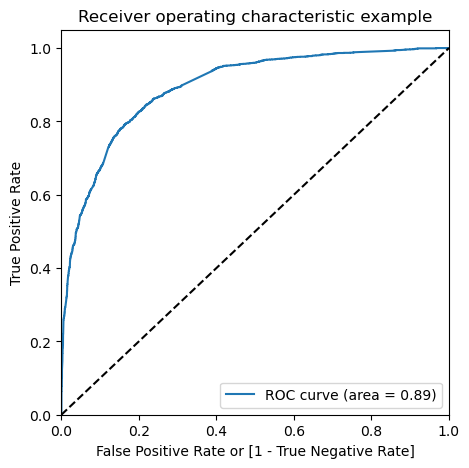

In [1361]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [1362]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.726487,1,1,1,1,1,1,1,1,1,0,0
1,0,0.082508,0,1,0,0,0,0,0,0,0,0,0
2,0,0.148745,0,1,1,0,0,0,0,0,0,0,0
3,0,0.088250,0,1,0,0,0,0,0,0,0,0,0
4,0,0.014652,0,1,0,0,0,0,0,0,0,0,0


In [1363]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.375773     1.000000     0.000000
0.1   0.1  0.652291     0.968354     0.462027
0.2   0.2  0.768194     0.896624     0.690881
0.3   0.3  0.805613     0.838397     0.785878
0.4   0.4  0.821785     0.780591     0.846584
0.5   0.5  0.814333     0.680591     0.894844
0.6   0.6  0.807357     0.614346     0.923546
0.7   0.7  0.798002     0.543882     0.950978
0.8   0.8  0.771999     0.433755     0.975616
0.9   0.9  0.733471     0.310970     0.987808


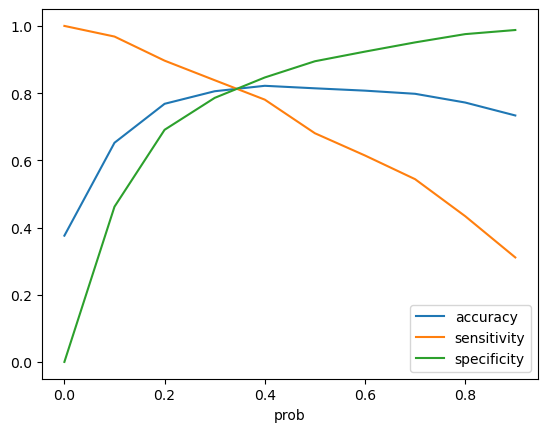

In [1364]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

Cut-off seems around 0.37. Check the various scores for that value of threshold.

In [1365]:
# Predicting with cut-off 0.37
y_train_pred_final['Predicted_0.37'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_0.37
0,0,0.726487,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.082508,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.148745,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.088250,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.014652,0,1,0,0,0,0,0,0,0,0,0,0


In [1366]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final["Predicted_0.37"] )
confusion

array([[3274,  663],
       [ 486, 1884]], dtype=int64)

In [1367]:
# Calculating Precision, recall, F1 score, specificity and sensitivity
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

Pricision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_score = 2*Pricision*Recall/(Pricision+Recall)
Specificity = TN/(TN+FP)
Sensitivity = TP/(TP+FN)
accuracy = (TP+TN)/(TP+TN+FP+FN)

print("Pricision: ", Pricision)
print("Recall: ", Recall)
print("F1_score: ", F1_score)
print("Specificity: ", Specificity)
print("Sensitivity: ", Sensitivity)
print("Accuracy: ", accuracy)

Pricision:  0.7396937573616019
Recall:  0.7949367088607595
F1_score:  0.7663209273947528
Specificity:  0.8315976631953264
Sensitivity:  0.7949367088607595
Accuracy:  0.8178214682099255


Value of recall and sensitivity has increase while predicting with cut-off value of 0.37 while accuracy has remian almost same.

# Step - 6: Making predictions on the test set

## Scaling and fitting model on test set

In [1369]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1370]:
X_test = X_test[col]

In [1371]:
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Unsubscribed
1260,1.0,0,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0
2103,1.0,0,0.233333,0.413732,0,0,0,0,0,0,0,1,0,0
7109,1.0,0,0.066667,0.203785,0,0,1,0,0,0,0,0,0,0
8918,1.0,0,0.200000,0.221391,0,0,1,0,0,0,0,1,0,0
2826,1.0,0,0.233333,0.560299,0,0,1,0,0,0,0,0,0,0


In [1372]:
y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred.head()

1260    0.197974
2103    0.752339
7109    0.371195
8918    0.824549
2826    0.794242
dtype: float64

In [1373]:
y_pred_1 = pd.DataFrame(y_test_pred, columns=['y_pred_1'])
y_pred_1.head()

,y_pred_1
1260,0.197974
2103,0.752339
7109,0.371195
8918,0.824549
2826,0.794242


In [1374]:
# Add y_test to the dataframe
y_pred_final = pd.concat([y_test, y_pred_1],axis=1)
y_pred_final.head()

,Converted,y_pred_1
1260,0,0.197974
2103,1,0.752339
7109,0,0.371195
8918,0,0.824549
2826,1,0.794242


## Predictions with cut-off 0.3

In [1375]:
y_pred_final['final_predicted'] = y_pred_final.y_pred_1.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,y_pred_1,final_predicted
1260,0,0.197974,0
2103,1,0.752339,1
7109,0,0.371195,1
8918,0,0.824549,1
2826,1,0.794242,1


In [1376]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion

array([[1295,  366],
       [ 154,  888]], dtype=int64)

In [1377]:
# Calculating Precision, recall, F1 score, specificity and sensitivity
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

Pricision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_score = 2*Pricision*Recall/(Pricision+Recall)
Specificity = TN/(TN+FP)
Sensitivity = TP/(TP+FN)
accuracy = (TP+TN)/(TP+TN+FP+FN)

print("Pricision: ", Pricision)
print("Recall: ", Recall)
print("F1_score: ", F1_score)
print("Specificity: ", Specificity)
print("Sensitivity: ", Sensitivity)
print("Accuracy: ", accuracy)

Pricision:  0.7081339712918661
Recall:  0.8522072936660269
F1_score:  0.7735191637630662
Specificity:  0.7796508127633955
Sensitivity:  0.8522072936660269
Accuracy:  0.8076211616722161


## Prediction with cut-off 0.37

In [1378]:
y_pred_final['final_predicted'] = y_pred_final.y_pred_1.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,Converted,y_pred_1,final_predicted
1260,0,0.197974,0
2103,1,0.752339,1
7109,0,0.371195,1
8918,0,0.824549,1
2826,1,0.794242,1


In [1379]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion

array([[1374,  287],
       [ 202,  840]], dtype=int64)

In [1380]:
# Calculating Precision, recall, F1 score, specificity and sensitivity
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

Pricision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_score = 2*Pricision*Recall/(Pricision+Recall)
Specificity = TN/(TN+FP)
Sensitivity = TP/(TP+FN)
accuracy = (TP+TN)/(TP+TN+FP+FN)

print("Pricision: ", Pricision)
print("Recall: ", Recall)
print("F1_score: ", F1_score)
print("Specificity: ", Specificity)
print("Sensitivity: ", Sensitivity)
print("Accuracy: ", accuracy)

Pricision:  0.7453416149068323
Recall:  0.8061420345489443
F1_score:  0.7745504840940526
Specificity:  0.827212522576761
Sensitivity:  0.8061420345489443
Accuracy:  0.8190899001109878


## Prediction with cut-off 0.42

In [1381]:
y_pred_final['final_predicted'] = y_pred_final.y_pred_1.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,y_pred_1,final_predicted
1260,0,0.197974,0
2103,1,0.752339,1
7109,0,0.371195,0
8918,0,0.824549,1
2826,1,0.794242,1


In [1382]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion

array([[1419,  242],
       [ 227,  815]], dtype=int64)

In [1383]:
# Calculating Precision, recall, F1 score, specificity and sensitivity
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

Pricision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_score = 2*Pricision*Recall/(Pricision+Recall)
Specificity = TN/(TN+FP)
Sensitivity = TP/(TP+FN)
accuracy = (TP+TN)/(TP+TN+FP+FN)

print("Pricision: ", Pricision)
print("Recall: ", Recall)
print("F1_score: ", F1_score)
print("Specificity: ", Specificity)
print("Sensitivity: ", Sensitivity)
print("Accuracy: ", accuracy)

Pricision:  0.771050141911069
Recall:  0.7821497120921305
F1_score:  0.7765602667937113
Specificity:  0.8543046357615894
Sensitivity:  0.7821497120921305
Accuracy:  0.826489086200518


## Prediction with cut-off 0.5

In [1384]:
y_pred_final['final_predicted'] = y_pred_final.y_pred_1.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Converted,y_pred_1,final_predicted
1260,0,0.197974,0
2103,1,0.752339,1
7109,0,0.371195,0
8918,0,0.824549,1
2826,1,0.794242,1


In [1385]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion

array([[1486,  175],
       [ 316,  726]], dtype=int64)

In [1386]:
# Calculating Precision, recall, F1 score, specificity and sensitivity
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

Pricision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1_score = 2*Pricision*Recall/(Pricision+Recall)
Specificity = TN/(TN+FP)
Sensitivity = TP/(TP+FN)
accuracy = (TP+TN)/(TP+TN+FP+FN)

print("Pricision: ", Pricision)
print("Recall: ", Recall)
print("F1_score: ", F1_score)
print("Specificity: ", Specificity)
print("Sensitivity: ", Sensitivity)
print("Accuracy: ", accuracy)

Pricision:  0.8057713651498335
Recall:  0.6967370441458733
F1_score:  0.7472979927946475
Specificity:  0.8946417820590006
Sensitivity:  0.6967370441458733
Accuracy:  0.8183499815020348
